In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## EDA

In [96]:
df = pd.read_csv('./data/BankChurners.csv')

In [97]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

## Feature Selection

In [99]:
use_data = ["Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Credit_Limit"]

In [100]:
df = df[use_data]

In [101]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,12691.0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,8256.0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,3418.0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3313.0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,4716.0


Learning the dtypes of columns' and how many non-null values are there in those columns

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10127 non-null  object 
 1   Customer_Age     10127 non-null  int64  
 2   Gender           10127 non-null  object 
 3   Dependent_count  10127 non-null  int64  
 4   Education_Level  10127 non-null  object 
 5   Marital_Status   10127 non-null  object 
 6   Income_Category  10127 non-null  object 
 7   Card_Category    10127 non-null  object 
 8   Credit_Limit     10127 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 712.2+ KB


Checking the shape—i.e. size—of the data

In [103]:
df.shape

(10127, 9)

Getting the statistical summary of dataset

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
Dependent_count,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.0,4549.0,11067.5,34516.0


Checking for the missing values

In [105]:
df.isna().sum()

Attrition_Flag     0
Customer_Age       0
Gender             0
Dependent_count    0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
Credit_Limit       0
dtype: int64

Checking for the duplicated values

In [106]:
df.duplicated().sum()

30

In [107]:
df.drop_duplicates(inplace=True)

In [108]:
df.duplicated().sum()

0

## One-Hot Encoding and Train-Test Split

In [109]:
input = df.drop (['Attrition_Flag'], axis=1)
target = df['Attrition_Flag']

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10097 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10097 non-null  object 
 1   Customer_Age     10097 non-null  int64  
 2   Gender           10097 non-null  object 
 3   Dependent_count  10097 non-null  int64  
 4   Education_Level  10097 non-null  object 
 5   Marital_Status   10097 non-null  object 
 6   Income_Category  10097 non-null  object 
 7   Card_Category    10097 non-null  object 
 8   Credit_Limit     10097 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 788.8+ KB


In [112]:
le_Attrition_Flag	=LabelEncoder()
le_Customer_Age=LabelEncoder()
le_Gender=LabelEncoder()
le_Dependent_count=LabelEncoder()
le_Education_Level=LabelEncoder()
le_Marital_Status=LabelEncoder()
le_Income_Category=LabelEncoder()
le_Card_Category=LabelEncoder()
le_Credit_Limit=LabelEncoder()

In [113]:
# input['Attrition_Flag_n'] = le_Attrition_Flag.fit_transform(input['Attrition_Flag'])
input['Customer_Age_n'] = le_Customer_Age.fit_transform(input['Customer_Age'])
input['Gender_N'] = le_Customer_Age.fit_transform(input['Gender'])
input['Dependent_count_n'] = le_Customer_Age.fit_transform(input['Dependent_count'])
input['Education_Level_n'] = le_Customer_Age.fit_transform(input['Education_Level'])
input['Marital_Status_n'] = le_Customer_Age.fit_transform(input['Marital_Status'])
input['Income_Category_n'] = le_Customer_Age.fit_transform(input['Income_Category'])
input['Card_Category_n'] = le_Customer_Age.fit_transform(input['Card_Category'])
input['Credit_Limit_n'] = le_Customer_Age.fit_transform(input['Credit_Limit'])


In [114]:
input_n = input.drop(["Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Credit_Limit"], axis=1)

In [115]:
input_n

,Customer_Age_n,Gender_N,Dependent_count_n,Education_Level_n,Marital_Status_n,Income_Category_n,Card_Category_n,Credit_Limit_n
0,19,1,3,3,1,2,0,4623
1,23,0,5,2,2,4,0,3623
2,25,1,3,2,1,3,0,1623
3,14,0,4,3,3,4,0,1552
4,14,1,3,5,1,2,0,2363
...,...,...,...,...,...,...,...,...
10122,24,1,2,2,2,1,0,1975
10123,15,1,2,6,0,1,0,2139
10124,18,0,1,3,1,4,0,2671
10125,4,1,2,2,3,1,0,2615


In [116]:
from sklearn.model_selection import train_test_split

make random state and make test_size 0.2 or 2

In [117]:
x_train, x_test, y_train, y_test = train_test_split(input_n, target, test_size=0.2, random_state=500)

result from train dataset

In [118]:
x_train.shape

(8077, 8)

result from test dataset

In [119]:
x_test.shape

(2020, 8)

## Decison Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
tree_data = DecisionTreeClassifier( random_state=500)
tree_data.fit(x_train, y_train)

DecisionTreeClassifier(random_state=500)

In [122]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

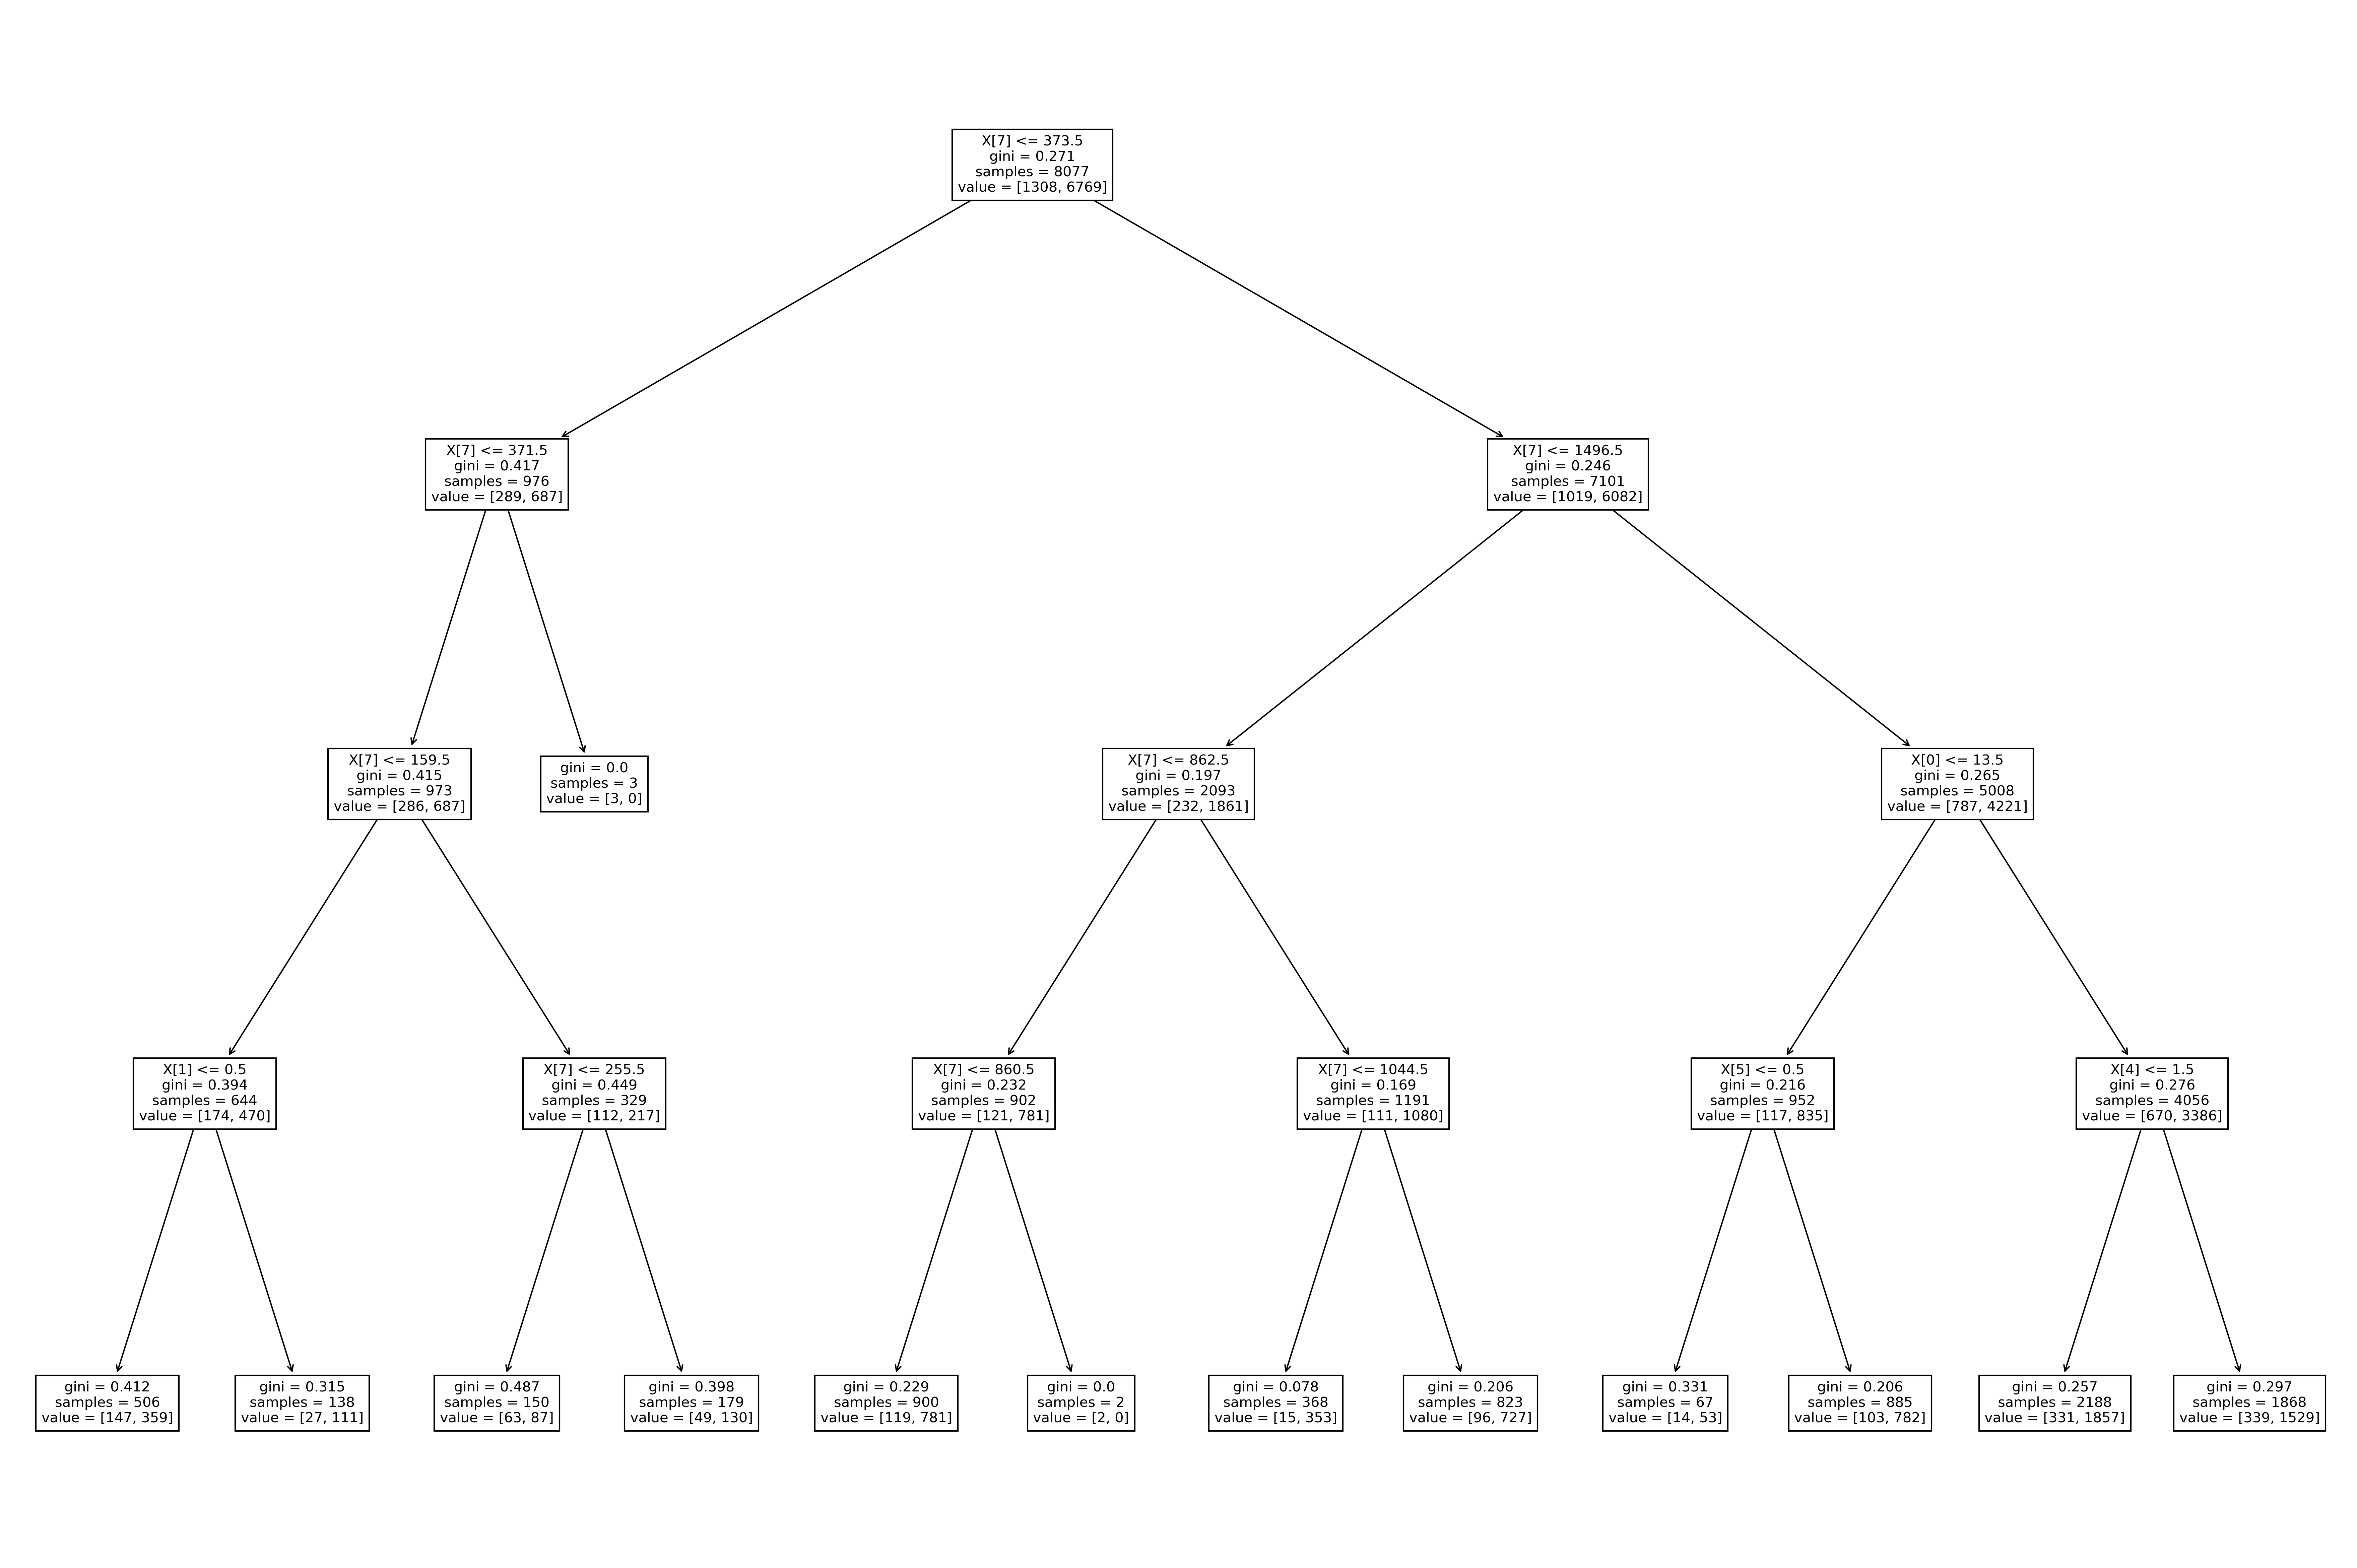

In [123]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 300
plt.subplots(figsize=(30, 20))
tree.plot_tree(model, fontsize=10)
plt.show()

In [124]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       317
Existing Customer       0.84      1.00      0.91      1703

         accuracy                           0.84      2020
        macro avg       0.42      0.50      0.46      2020
     weighted avg       0.71      0.84      0.77      2020



In [125]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

print(f'Accuracy: {model.score(x_test, y_test)}')

Accuracy: 0.8415841584158416


In [126]:
from sklearn import tree
model.score(input_n,target)

# Prediksi Model
model.predict([[0,0,0,0,0,0,1,0]])

c:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Existing Customer'], dtype=object)

## KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [129]:
y_pred = knn_model.predict(x_test)

In [130]:
from sklearn.metrics import classification_report

y_pred = knn_model.predict(x_test)

print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.27      0.05      0.09       317
Existing Customer       0.85      0.97      0.91      1703

         accuracy                           0.83      2020
        macro avg       0.56      0.51      0.50      2020
     weighted avg       0.76      0.83      0.78      2020



In [131]:
accuracy = knn_model.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8282178217821782


In [132]:
from sklearn import tree
knn_model.score(input_n,target)

# Prediksi Model
knn_model.predict([[0,0,0,0,0,0,1,0]])

c:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Existing Customer'], dtype=object)

## Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB

In [134]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train, y_train)

In [135]:
y_pred = modelnb.predict(x_test)
print("Prediksi Naive Bayes: ", y_pred)

Prediksi Naive Bayes:  ['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Existing Customer' 'Existing Customer' 'Existing Customer']


In [136]:
from sklearn.metrics import accuracy_score
accuracy_naive = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes: ", accuracy_naive)

Akurasi Naive Bayes:  0.843069306930693


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       317
Existing Customer       0.84      1.00      0.91      1703

         accuracy                           0.84      2020
        macro avg       0.42      0.50      0.46      2020
     weighted avg       0.71      0.84      0.77      2020



c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [138]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [139]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [140]:
svm_model = SVC(kernel = 'linear', random_state = 0)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [141]:
y_pred = svm_model.predict(x_test)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, y_pred)
print("Akurasi SVM: ", accuracy_svm)

Akurasi SVM:  0.843069306930693


In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       317
Existing Customer       0.84      1.00      0.91      1703

         accuracy                           0.84      2020
        macro avg       0.42      0.50      0.46      2020
     weighted avg       0.71      0.84      0.77      2020



c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
